In [95]:
#import
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline

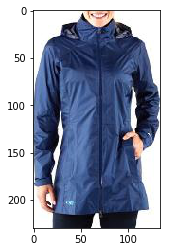

In [96]:
img_path = "gear_images/test_images/101634-Copy1.jpeg"
x = plt.imread(img_path)
plt.imshow(x)

(128, 128)


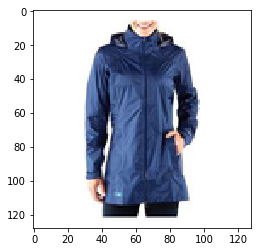

In [76]:
import math
x.shape
idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )

pad = x.shape[0] - x.shape[1]

padX = idealSize - x.shape[0]
padY = idealSize - x.shape[1]

padx_before = padX//2
padx_after=  idealSize - padx_before - x.shape[0]

pady_before = padY//2
pady_after = idealSize - pady_before - x.shape[1]

newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

img = Image.fromarray(newArr, 'RGB')
img2 = img.resize((128,128), Image.ANTIALIAS)
plt.imshow(img2)
print(img2.size)


(array([ 1888.,  3541.,  3740.,  3387.,  2553.,  1393.,  1171.,   574.,
          370., 30535.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

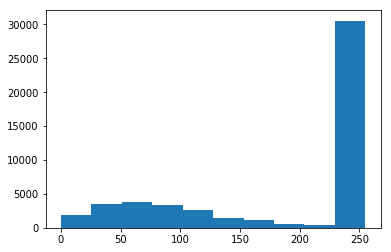

In [97]:
from skimage import exposure
img3 = np.asarray(img2)
plt.hist(img3.flatten())

In [100]:
# img4 = exposure.equalize_hist(img3)
# plt.hist(img4.flatten())

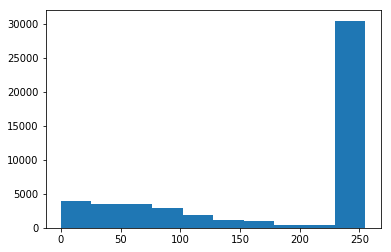

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


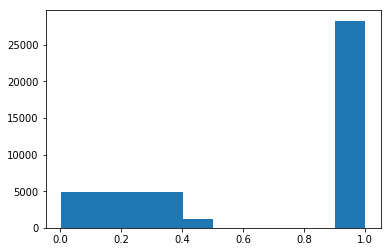

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


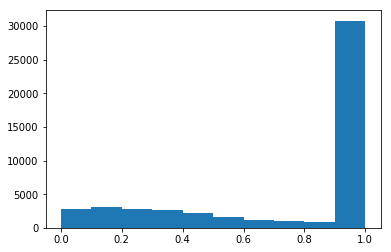

In [124]:
from skimage import exposure

# img = im 
img = img3

# Contrast stretching
p2 = np.percentile(img, 2)
p98 = np.percentile(img, 98)
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
plt.hist(img_rescale.flatten())
plt.show()
# plt.imshow(img_rescale)

# Equalization
img_eq = exposure.equalize_hist(img)
plt.hist(img_eq.flatten())
plt.show()

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plt.hist(img_adapteq.flatten())
plt.show()

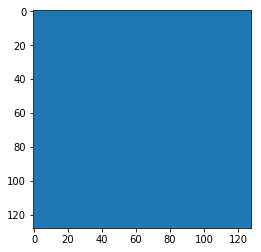

In [127]:
img5 = np.array(img_adapteq)
new_img = Image.fromarray(normalize(img5).astype('uint8'), 'RGB')
plt.hist(np.asarray(new_img).flatten())


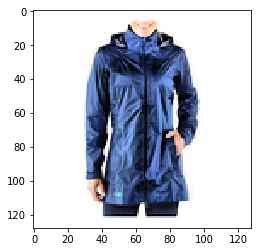

In [128]:
plt.imshow(new_img)

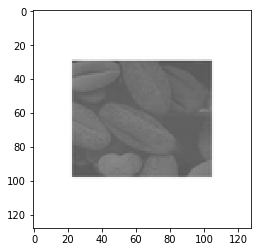

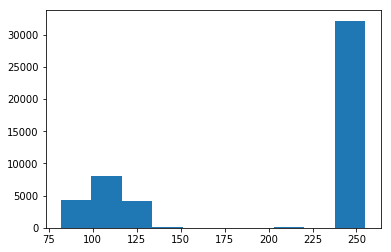

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


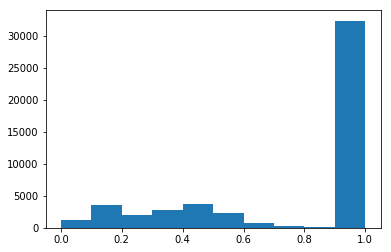

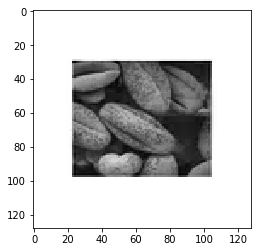

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [148]:
def pad_image(x): #image
    x.shape
    idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )

    pad = x.shape[0] - x.shape[1]

    padX = idealSize - x.shape[0]
    padY = idealSize - x.shape[1]

    padx_before = padX//2
    padx_after=  idealSize - padx_before - x.shape[0]

    pady_before = padY//2
    pady_after = idealSize - pady_before - x.shape[1]

    newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

    img = Image.fromarray(newArr, 'RGB')
    img2 = img.resize((128,128), Image.ANTIALIAS)
    plt.imshow(img2)
    return img2

def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def contrast_stretching(img): #img as image
    plt.imshow(img)
    plt.show()
    # Adaptive Equalization
    plt.hist(np.asarray(img).flatten())
    plt.show()
    img_adapteq = exposure.equalize_adapthist(np.asarray(img), clip_limit=0.03)
    plt.hist(img_adapteq.flatten())
    plt.show()
    plt.imshow(img_adapteq)
    plt.show()
    return img_adapteq

def preprocess_img(img):
    img1 = pad_image(img)
    img2 = contrast_stretching(img1)
    return img2

img_path = "gear_images/test_images/EXAMPLE2.JPG"
y = plt.imread(img_path)
preprocess_img(y)
    